In [1]:
import PIL
import numpy as np
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

def text2img(text1, text2, fontfullpath = 'arial.ttf', fontsize = 30):

    font = ImageFont.load_default() if fontfullpath == None else ImageFont.truetype(fontfullpath, fontsize)

    img = Image.new("L", (90, 90), 255)
    draw = ImageDraw.Draw(img)

    draw.text( (15, 15), text1, 0, font=font)
    draw.text( (15, 45), text2, 0, font=font)

    [x, y] = np.random.randint(15, 45, size=2)
    area = (x, y, x+30, y+30)
    img1 = img.crop( area )
    ang, ang2 = np.random.randint(-90, 90), np.random.randint(-5, 5)
    img = img.rotate(ang, resample=Image.BILINEAR)
    img = img.rotate(ang2 - ang, resample=Image.BILINEAR)
    [dx, dy] = np.random.randint(-7, 7, size=2)
    area = (x+dx, y+dy, x+dx+30, y+dy+30)
    img2 = img.crop( area )
    return img1, img2;


In [2]:
img1, img2 = text2img("abcd", 'edFg', fontfullpath="arial.ttf")
img1.save('test.png')
img2.save('test2.png')

In [3]:
import string
import random
def randomString(n=4):
    return ''.join(random.choice(string.ascii_lowercase + string.ascii_uppercase + string.digits) for _ in range(n))
def generateXY():
    rands1 = randomString()
    rands2 = randomString()
    img1, img2 = text2img(rands1, rands2)
    y = 1
    if np.random.randint(2)==1:
        rands1 = randomString()
        rands2 = randomString()
        _, img2 = text2img(rands1, rands2)
        y = 0
    x = np.hstack([np.array(img1), np.array(img2)])
    return x, y

def generateTrainTest(n_train, n_test):
    x_train, y_train = [], []
    for i in range(0, n_train):
        x, y = generateXY()
        x_train.append(x)
        y_train.append(y)
    x_test, y_test = [], []
    for i in range(0, n_test):
        x, y = generateXY()
        x_test.append(x)
        y_test.append(y)
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

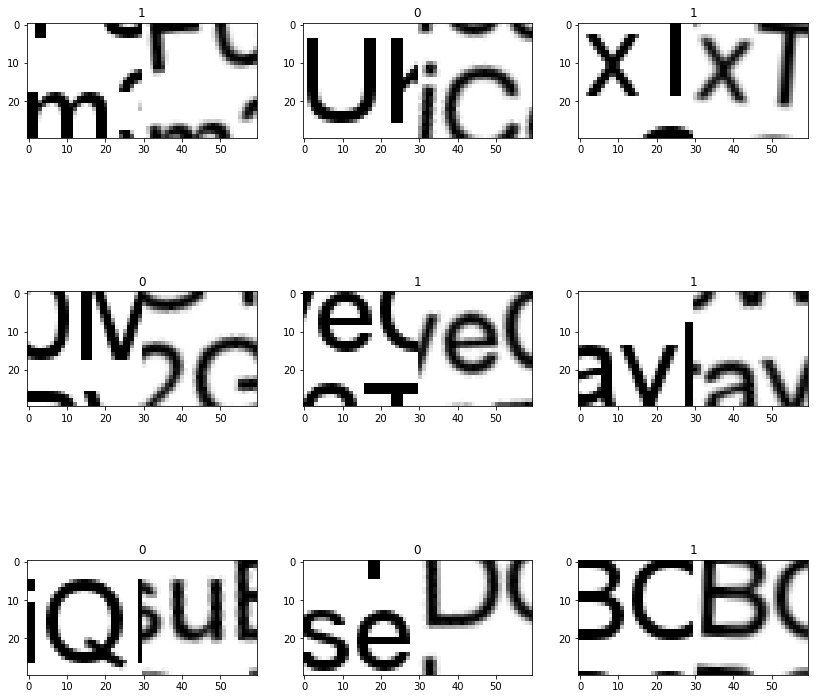

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x_train, y_train, x_test, y_test = generateTrainTest(10, 5)
x_train.shape

def draw():
    plt.figure(figsize=(14, 14))
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        img = i-1
        plt.imshow(x_train[img, :, :], cmap = plt.get_cmap('gray')) 
        plt.title(y_train[img])

draw()

In [6]:
import pickle

x_train, y_train, x_test, y_test = generateTrainTest(10000, 5000)
train = {'features': x_train, 'labels': y_train}
test = {'features': x_test, 'labels': y_test}
pickle.dump(train, open('train.p', 'wb') )
pickle.dump(test, open('test.p', 'wb') )